<a href="https://colab.research.google.com/github/s110m/sample/blob/master/imageclassification_fashion_cloths.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import tensorflow as tf
from tensorflow import keras
print(tf.__version__)
print(keras.__version__)

2.4.1
2.4.0


In [3]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [6]:
X_valid, X_train = X_train_full[:5000], X_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [8]:
class_names = [ 'T-shirt/top' , 'Trouser' , 'Pullover' , 'Dress' , 'Coat' , 'Sandal' , 'Shirt' , 'Sneaker' , 'Bag' , 'Ankle boot' ]

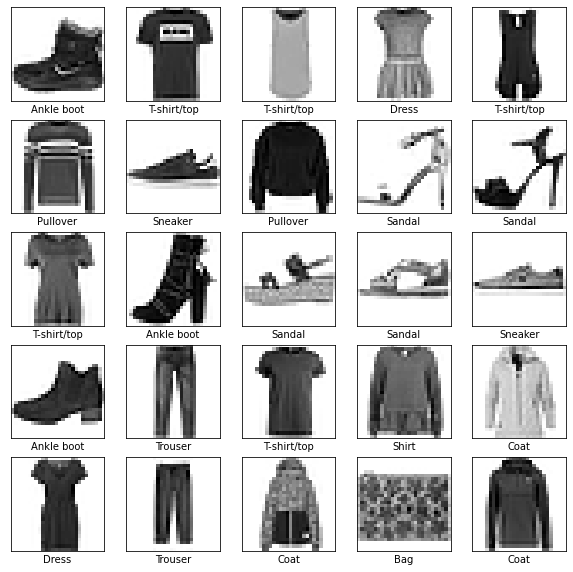

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train_full[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train_full[i]])
plt.show()

In [10]:
X_valid, X_train = X_valid / 255., X_train / 255.
X_test = X_test / 255.

In [11]:
model = keras.models.Sequential([keras.layers.Flatten(input_shape = [28, 28]),
keras.layers.Dense(300, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(100, activation = 'relu' ),
keras.layers.Dense(10, activation = 'softmax' )])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 10)                1010      
Total params: 286,810
Trainable params: 286,810
Non-trainable params: 0
__________________________________________________

In [13]:
model.compile(loss = 'sparse_categorical_crossentropy',
optimizer = 'sgd',
metrics = ['accuracy'])

In [14]:
history = model.fit(X_train,
                    y_train,
                    epochs = 10,
                    validation_data = (X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 6s 3ms/step - loss: 1.0853 - accuracy: 0.6425 - val_loss: 0.6017 - val_accuracy: 0.7842
Epoch 2/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4927 - accuracy: 0.8252 - val_loss: 0.4265 - val_accuracy: 0.8496
Epoch 3/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4372 - accuracy: 0.8435 - val_loss: 0.3977 - val_accuracy: 0.8582
Epoch 4/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3986 - accuracy: 0.8582 - val_loss: 0.3988 - val_accuracy: 0.8556
Epoch 5/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3705 - accuracy: 0.8661 - val_loss: 0.3527 - val_accuracy: 0.8746
Epoch 6/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3526 - accuracy: 0.8722 - val_loss: 0.3896 - val_accuracy: 0.8638
Epoch 7/10
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3409 - accuracy: 0.8746 - val_loss: 0.3473 - val_accuracy:

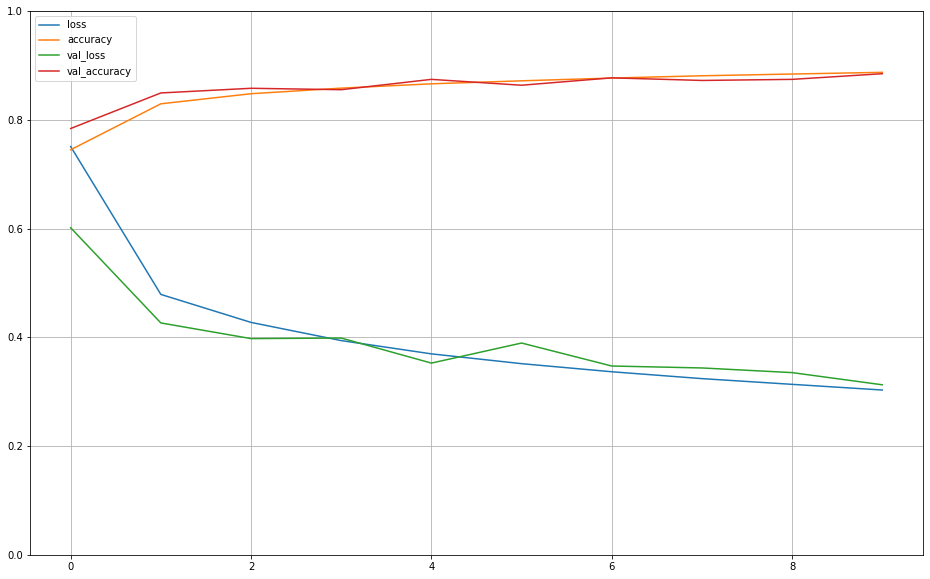

In [15]:
pd.DataFrame(history.history).plot(figsize = (16, 10))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()